In [ ]:
import json

with open('/Users/daniel/ideaProjects/perspective/claim_persp_evidences.json', encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

In [65]:
with open('/Users/daniel/ideaProjects/perspective/stopwords.txt') as stopwords_file: 
    stopwords = stopwords_file.read().split("\n") 
print(len(stopwords))

683


In [45]:
print(len(data))

1006


In [53]:
from ccg_nlpy import remote_pipeline
import re
import operator

rx = re.compile('\W+')

pipeline = remote_pipeline.RemotePipeline(server_api='http://macniece.seas.upenn.edu:4001')

output = []

for claim in data: 
    
    noun_phrase_map = {}
#     print(claim.keys())
    print("--------------------")
    print(claim['claim_title'])
    doc_claim = pipeline.doc(claim['claim_title'])
    doc_related = pipeline.doc(rx.sub(' ', claim['related']).strip())
#     print(doc_claim.get_shallow_parse)
#     doc_related = pipeline.doc(claim['related'])
    claim_nps = [x['tokens'].lower() for x in doc_claim.get_shallow_parse.get_cons() if x['label'] == 'NP']

    if doc_related.get_shallow_parse != None and doc_related.get_shallow_parse.get_cons() != None:     
        related_nps = [x['tokens'].lower() for x in doc_related.get_shallow_parse.get_cons() if x['label'] == 'NP']
    else: 
        related_nps = []

    for x in claim_nps: 
        if x in stopwords: 
            continue 
        if x in noun_phrase_map: 
            noun_phrase_map[x] += 1
        else: 
            noun_phrase_map[x] = 3
            
    for x in related_nps: 
        if x in stopwords: 
            continue 
        if x in noun_phrase_map: 
            noun_phrase_map[x] += 1
        else: 
            noun_phrase_map[x] = 1
    
    sorted_list = sorted(noun_phrase_map.items(), key=operator.itemgetter(1), reverse=True)

    
    output.append({'claim_title': claim['claim_title'], 'claim_id': claim['claim_id'], 'noun_phrases': sorted_list[0:10]})
    
#     print(sorted_list)

    with open('claims_with_topics.json', 'w') as outfile:
        json.dump(output, outfile)

INFO:ccg_nlpy.pipeline_config:Using pipeline web server with API: http://macniece.seas.upenn.edu:4001
INFO:ccg_nlpy.remote_pipeline:pipeline has been set up


--------------------
The use of child performers should be banned
--------------------
Celebrities should be exempt from National Service (in South Korea)
--------------------
Trade is better than aid
--------------------
It should be allowed to have military recruitment in schools
--------------------
Rupert Murdoch is not a fit person to run an international media corporation
--------------------
Smoking should further be restricted
--------------------
Animals have rights.
--------------------
Proportional representation is necessary.
--------------------
There must be a child curfews
--------------------
It is important to use a graduated response to combat unauthorised file-sharing of copyrighted material
--------------------
Internet access is a human right
--------------------
It is important to use foreign aid funds to research and distribute software that allows bloggers and journalists in non-democratic countries to evade censorship and conceal their online activities.


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Ratify the Anti-Counterfeiting Trade Agreement (ACTA).
--------------------
Governments be allowed to disrupt Internet service on grounds of national security.
--------------------
A new global body, the United Nations Committee for Internet Related Policies, take over internet governance.


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The net neutrality legislation has to be supported.
--------------------
There should be a presumption in favour of publication for information held by public bodies
--------------------
Goal line technology has to be adopted in football
--------------------
permit the use of performance enhancing drugs in professional sports
--------------------
All nations should ban bullfighting
--------------------
Instant Replay Should Be Used in Major League Baseball
--------------------
The music that glorifies violence against women should be banned
--------------------
It is crucial to explore the universe
--------------------
Gay couples should be allowed to marry
--------------------
The Catholic Church is justified in forbidding the use of barrier methods of contraception
--------------------
Atheism is the only way
--------------------
Anarchism is a valuable political ideology
--------------------
Democracy has to be imposed, if needed
--------------------
Capitalism 

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Blasphemy criminalise
--------------------
Music containing lyrics that glorify violent and criminal lifestyles should be banned
--------------------
The leaking of military documents by Anat Kamm was justified
--------------------
Users of extremist websites should be punished
--------------------
India’s Ban on the Satanic Verses is justified
--------------------
Corporations’ Use of IP Laws in Relation to Event Sponsorship Poses a Threat to Freedom of Expression
--------------------
We should fear the power of government over the Internet
--------------------
Religious freedom abroad should be one of the primary foreign policy concerns for any country
--------------------
The BBC should be free to blaspheme
--------------------
It makes sense to drive to an out of town to a shopping centre
--------------------
Nuclear technology must be adopted
--------------------
Performing tests on animals must be banned
--------------------
Private universities in the UK mus

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Sexual orientation should be considered grounds for asylum
--------------------
Prostitution has to be legalised
--------------------
The right to asylum should not be absolute
--------------------
Anti-Social Behaviour Orders (UK) must be scraped
--------------------
Positive discrimination has to be used to increase diversity in university
--------------------
require the ICC to allow a defence of “cultural relativism” to the crime of recruiting and using child soldiers


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
An amnesty to illegal immigrants has to be granted
--------------------
The sale of children’s toys as part of fast food meals must be prohobited.
--------------------
Nations of the world should increase protection of the economic and social rights of migrants
--------------------
Children in developing countries should be sponsored
--------------------
You should never have children
--------------------
Housewives should be paid for their work
--------------------
The USA's social security schemes should be privatized
--------------------
Security profiling at airports is justified
--------------------
Cohabiting couples who wish to end their relationships should be allowed to request that the courts supervise the division of their property
--------------------
Hate crime 'enhancements' are unjust
--------------------
The age of consent laws should be lowered
--------------------
Partial birth abortions should be banned
--------------------
Marriage is an outdate

--------------------
Feminism Is Still Needed
--------------------
Countries with an imbalanced male/female ratio skewed towards males should encourage parents to produce girls


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Parents should be allowed to genetically screen foetuses for heritable diseases
--------------------
Hate speech on campus has to censored
--------------------
Parents should be able to choose the sex of their children
--------------------
It should be allowed to patent genes
--------------------
Homosexuals should be able to adopt
--------------------
All illegal immigrants must be repatriated
--------------------
Racial quotas must be set in South African rugby
--------------------
South Africa should host an Olympics
--------------------
Gabon hosting the Africa Cup of Nations was a good thing
--------------------
Restrictions must be imposed on overseas players in football
--------------------
Playoffs must be implemented in collegiate level american football
--------------------
Boycott the Euro 2012 in Ukraine unless Yulia Timoshenko is released from prison
--------------------
Ban countries with very harsh training methods from participating in international

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Ban all anonymous posting and commenting on the Internet
--------------------
You have nothing to worry about surveillance if you have done nothing wrong
--------------------
Indiscriminate NSA surveillance of the rest of the world hurts the United States
--------------------
You should join Facebook
--------------------
I believe in the Right to be forgotten
--------------------
During riots it might make sense to block access to social messaging networks
--------------------
Western companies have to incentivised to build software that provides anonymity to those involved in uprisings
--------------------
State funding to universities have to be conditioned upon all academic work being made available to the general public
--------------------
Online gambling has to be banned
--------------------
Universities should make all academic work they produce, including scholarly articles, course handbooks and recorded lectures, available to the general public
-----------

--------------------
Parents have to be allowed to monitor their children's online and mobile communications
--------------------
Private lives of public figures should be open to press scrutiny.


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
politicians have no right to privacy
--------------------
We have to offer amnesty to bloggers currently prosecuted by their native states
--------------------
We have to cut the length of copyright protection
--------------------
It is important to ban the sale of surveillance technology to non-democratic countries


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Targeted online advertising on the basis of user profiles and demographics must be banned
--------------------
The state should provide broadband internet through nationalized companies
--------------------
Internet service providers should be allowed to block access to extremist websites
--------------------
Do not allow companies to collect/sell the personal data of their clients


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
All literature, art, photography, film and music should be released under Creative Commons licenses
--------------------
States should stimulate (or subsidise) mother tongue education for large immigrant groups.
--------------------
Forced evictions are necessary for African cities to become global players.
--------------------
We have to follow countries such as Senegal that have quotas for women in politics
--------------------
The government of Uganda has failed its citizens over LGBT rights
--------------------
We have to teach creationism in schools
--------------------
Domestic intelligence agencies have a legitimate role to play in democracy
--------------------
Wire-tapped and ‘intercepted’ evidence must be allowed as admissible in court
--------------------
The right to anonymous posting on the internet should be protected by law
--------------------
There must be a ban the sale of 3D printers to households
--------------------
The new technologies will ma

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Belief in God is irrational
--------------------
Religious beliefs should override government laws
--------------------
The Church of England should be separated from the British state.
--------------------
It is fine to kill one to save many
--------------------
Make all museums free of charge
--------------------
Remove the requirement for Catholic Priests to take a vow of celibacy
--------------------
Remove the words "under God" from the American Pledge of Allegiance
--------------------
(as a Christian Church) allow the ordination of gay and lesbian priests
--------------------
Traditional university has to be replaced by online learning
--------------------
Tanzania’s taxation on mobile phones is a good model
--------------------
We have to produce high quality generic drugs for Africa
--------------------
German prosecutors should investigate NSA surveillance of Angela Merkel
--------------------
Ban animal testing
--------------------
Every child should hav

--------------------
Cyberbullies must be punished with prison even if under 18
--------------------
Intellectual migration (brain drain) is caused by a lack of belonging rather than a lack of opportunities


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Cut aid to African states that criminalise homosexuality
--------------------
We must enable free movement of labour across Africa to alleviate poverty disparities.
--------------------
African cities need to invest more in housing to replace slums
--------------------
The feminisation of Africa’s labour force is empowering women
--------------------
Poverty is the most important security issue facing Africa
--------------------
Civil society should be granted a wider participation in Africa’s political life
--------------------
Legal empowerment is provided for women through land titling
--------------------
We must hold a referendum on UK membership in the EU
--------------------
The Arab Spring revolutions can create stable democracies.
--------------------
All nations have a right to nuclear weapons
--------------------
The House of Lords should be reformed
--------------------
We have to employ mercenaries
--------------------
We should use torture to obtain i

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Should the U.S. Government continue to spend at current levels even if it means raising taxes
--------------------
We must let Catalan hold an independence referendum
--------------------
It is worth voting


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Abandon Kofi Annan’s peace plan for Syria
--------------------
Greece should default on its debt and return to the Drachma
--------------------
We support the New START Treaty
--------------------
The Dalai Lama’s ‘third way’ in Tibet
--------------------
Puerto Rico should seek American statehood
--------------------
We should directly elect city mayors
--------------------
Abolish the Superdelegate System for Democratic Party Conventions
--------------------
Quebec should secede from Canada
--------------------
Opinion polls harm the democratic process
--------------------
Recognise Kosovo as an independent state
--------------------
The EU, USA and other western donors should not fund any Palestinian government in which terrorist organisations participate
--------------------
University education should be free
--------------------
Grant politicians immunity from prosecution
--------------------
The UN should recognize a Palestinian state
--------------------
Re

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Abandon the timetable for withdrawal from Afghanistan
--------------------
The northern Ireland would be better off if united with the Republic of Ireland
--------------------
Abolish all collective bargaining rights claimed by trades unions
--------------------
We must support the use of truth and reconciliation commissions
--------------------
We must ban negative advertising in political campaigns
--------------------
We should encourage increased use of referendums


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The governance of the United States should be split between the two major US political parties
--------------------
We must hold all U.S. presidential primaries on the same day


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We oppose the U.S. hegemonic military power
--------------------
The US intervention in Libya, lacking congressional approval, was illegal
--------------------
Socialism is Dead
--------------------
The use of atomic bombs against Hiroshima and Nagasaki was justified
--------------------
The republican party has lost its way
--------------------
Abolish the monarchy.
--------------------
The United States’ individual health insurance mandate is unconstitutional
--------------------
Abolish the US Electoral College
--------------------
We must support the Scottish Independence
--------------------
There must be compulsory identity cards
--------------------
The War in Iraq was Worth the Cost
--------------------
Bribery is sometimes acceptable
--------------------
We must extend NATO membership to Georgia and Ukraine
--------------------
We must invade and forcibly reunify the Korean peninsula
--------------------
The U.S. Should Ban The Use of Cluster Bombs
-------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
There can be such a thing as a Just War
--------------------
Terrorism can be justified
--------------------
There must be referendums held on any new EU treaty
--------------------
There is a need for developing tactical nuclear weapons
--------------------
Abolish nuclear weapons
--------------------
We can trust Republicans with the economy
--------------------
Britain should join the Euro currency
--------------------
We must enforce term limits on the legislative branch of government
--------------------
Voting should become compulsory
--------------------
Self-determination of peoples is a human right
--------------------
Federal States are better than unitary nations
--------------------
Create a UN standing army
--------------------
We should support enforcing term limits on the executive branch of government
--------------------
We should detain terror suspects without trial
--------------------
The world has to ignore North Korean provocations
-----------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Assisted suicide should be legalized
--------------------
Civil liberties should be sacrificed for the greater good
--------------------
The right to trial can be limited by jury in some criminal cases
--------------------
UK would have more influence outside the EU
--------------------
Leaving the EU would increase British security
--------------------
UK should have a second Brexit referendum before leaving the EU
--------------------
We must have weapons inspectors leave Syria
--------------------
African leaders should be transparent about their health
--------------------
Launching a military coup against a democratic government can be justified
--------------------
Russia has the right to send troops into Crimea
--------------------
Throw Russia out of the G8
--------------------
It is a good idea to lease Crimea to Russia
--------------------
The African Union can meet its pledge to end all war on the continent by 2020


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Ariel Sharon was not tried for war crimes by an international court
--------------------
Eritrea is responsible for its isolation
--------------------
The Mo Ibrahim prize encourages good governance
--------------------
The Egyptian army was right to depose Morsi
--------------------
Put taxes/revenue from oil into a trust fund independent of politicians influence
--------------------
The prevalence of ‘African mercenaries’ is decreasing
--------------------
We must negotiate with terrorists
--------------------
Individuals who have committed atrocities in the Syrian Civil War should be investigated by the ICC
--------------------
European Parliament elections should involve only one voting district: all of Europe and not separate country seats
--------------------
The best way to protect Scottish interests in the EU is to vote for independence
--------------------
Turkey is not a democracy
--------------------
NATO has succeeded in Afghanistan
--------------------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Fund needle exchanges
--------------------
Cede control of the Falkland (Malvinas) Islands to Argentina
--------------------
Criminal justice should focus more on rehabilitation
--------------------
Disclose previous convictions in court
--------------------
Treat the desecration and destruction of high-value sites and property of cultural heritage as a crime against humanity
--------------------
Military action to intervene during atrocities without United Nations Security Council approval can be legal
--------------------
Create an African Criminal Court
--------------------
Guinea-Bissau should not let itself be turned in to a front of the US’ "war on drugs"
--------------------
Send Yanukovych to The Hague
--------------------
The ICC is not an effective deterrent
--------------------
The ICC is biased against Africa
--------------------
The Uhuru Kenyatta indictment was an unwelcome interference by the ICC
--------------------
Prosecutions help the healing pro

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The United States is responsible for Mexico’s drugs war
--------------------
Media reporting on violent crimes should be restricted
--------------------
Fines should be made relative to income
--------------------
Social disgust is legitimate grounds for restriction of artistic expression
--------------------
Social deprivation causes crime
--------------------
A legal qualification is worth the cost
--------------------
It is fine to do random drug-testing in schools
--------------------
The European Union should lift its ban on member states selling arms to China
--------------------
We should ban the depiction of smoking in films
--------------------
We should legalise the growing of coca leaf
--------------------
Beauty contests should be banned
--------------------
War criminals should be prosecuted
--------------------
The Schengen Agreement must be dissolved
--------------------
The US should have done more for Darfur
--------------------
The Guantanamo Bay 

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Obama was right to agree to meet rogue leaders without preconditions
--------------------
Europe should be federal
--------------------
We should end western states' control over the International Monetary Fund
--------------------
We should support the creation of a Free Trade Area of the Americas
--------------------
The Palestinian Statehood should be recognised by the United Nations General Assembly
--------------------
The integration of Africa through the African Union can succeed
--------------------
We should give cash to the poor to reduce poverty
--------------------
Take a visit the Yasukuni Shrine
--------------------
Dictatorship is the best path to development
--------------------
Build the Grand Inga Dam
--------------------
The African Union should create a standing army
--------------------
Ethiopia is right to build a dam on the River Nile
--------------------
Africa is really rising
--------------------
Create an international treaty/ban on cyber

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We must support the admission of Turkey to the EU
--------------------
The EU should engage in further enlargement
--------------------
Israel should return to its pre-1967 borders
--------------------
The world should intervene to prevent the collapse of the state in other countries
--------------------
The United Nations has failed
--------------------
Former colonial powers should pay reparations to former colonies
--------------------
We should expand NATO
--------------------
Europe still needs a constitution
--------------------
We believe in world government
--------------------
Jerusalem should be divided
--------------------
Offshoring is a good idea
--------------------
It is a good idea to build the Keystone XL pipeline
--------------------
We should drop the sanctions against Cuba.
--------------------
Britain should give up its EU rebate
--------------------
Switzerland and Norway should apply to join the EU
--------------------
The European Union shou

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The European Parliament should be the sovereign law-making body of Eurozone states
--------------------
In the conflict between Israel and Palestine, a two-state solution is better justified than a one-state solution
--------------------
You should always suspend directly delivered foreign development aid
--------------------
The United States is a ‘benign’ hegemon
--------------------
The United Nations budget must be frozen
--------------------
Grant the EU a permanent seat on the UN Security Council
--------------------
As the developed world, we must fund African climate adaptation
--------------------
Private sector involvement is necessary to improve healthcare in Africa


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We should provide access to microfinance for the ‘unbanked’
--------------------
The UN intervention in the Democratic Republic of Congo has been a success
--------------------
Men are the key to family planning in Uganda
--------------------
Governments must be encouraged to implement an ‘open sky’ agreement within Africa
--------------------
Ghana’s ban on smoking in public places is a model for Africa
--------------------
The outcome of the Paris Climate Conference needs to be an international treaty with binding emission cuts
--------------------
Deny Organs to Non-Donors
--------------------
Promote safe sex through education at schools


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Require the provision of cannabis in any state funded medical program
--------------------
Labels on food must be mandated to encourage people to eat better
--------------------
Introduce a “fat tax”
--------------------
Provide breakfast for all school students
--------------------
Airbrushing of women’s bodies in the media be banned
--------------------
New York City has the right to regulate the size of sodas bought on the market
--------------------
We must ban the promotion of diets
--------------------
Alternative medicine poses a threat to public health
--------------------
There mut be a system of universal healthcare
--------------------
Ban the use of trans fats in food stuffs
--------------------
Allow pharmaceutical companies to advertise directly to consumers
--------------------
Employees Should Be Compelled To Disclose Their HIV Status to Employers
--------------------
Multiple Vaccines Safe
--------------------
Ban alcohol
--------------------
Lmple

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Cape Verde’s regional future lies with Europe, not Africa
--------------------
The Seychelles should buy territory and relocate due to climate change


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Limited press and speech freedom will hinder progress in Rwanda
--------------------
Sao Tome would drop relations with Taiwan in favour of Mainland China
--------------------
Widen the East African Community
--------------------
Spain should cede Ceuta and Melilla to Morocco
--------------------
Implent the Virtual Doctor Project in Zambia


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Tunisia should not rely on tourism for economic growth
--------------------
The Chagos Islands must be returned to Mauritius
--------------------
The lack of investment in teachers is the greatest barrier to achieving universal primary education
--------------------
Nollywood could be an effective instrument to change perceptions of Africa
--------------------
African governments must implement tougher protections for animals
--------------------
Africans are worse off due to natural resources
--------------------
African borders must be redefined to reflect ethnic groups
--------------------
A permanent UNSC seat with veto power must be reserved to an African country
--------------------
Legalize sex work in order to make controls more feasible and effective to combat HIV/AIDS
--------------------
Julian Assange is a journalist
--------------------
Freedom of expression is more important than religious sensitivities
--------------------
A nation's history and myth

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The EU should abandon nuclear energy
--------------------
Adaptation should be the most urgent response to Climate Change
--------------------
School uniforms must be banned
--------------------
The payment of welfare benefits to parents should be tied to their children's school attendance records
--------------------
Vaccination must be made compulsory
--------------------
Introduce year round schooling
--------------------
Abolish standardized tests for University Admission
--------------------
Degrees in the creative arts are luxuries society can no longer afford
--------------------
Raise the school leaving age to 18
--------------------
Encourage fewer people to go to university


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Mathematics should not be a compulsory subject in schools.
--------------------
Homework is a waste of time
--------------------
Poetry should not be taught in schools
--------------------
Provision of higher education must be funded by taxing graduates
--------------------
Fund education using a voucher scheme
--------------------
Parents should be held responsible for their school-going children's discipline problems
--------------------
Make lessons in a foreign language compulsory for school pupils
--------------------
People should have a right to private education
--------------------
Raise The School Leaving Age To 18
--------------------
Make sex education mandatory in schools
--------------------
Ban homework
--------------------
Build a third Heathrow runway to maintain its position as a hub airport
--------------------
Ban the slaughter of animals which have not been stunned first
--------------------
Cease the exploitation of the Arctic Region
---------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Rumours about politicians should not be reported
--------------------
The imprisoned members of Pussy Riot should be considered political prisoners
--------------------
Limit the free speech rights of corporations that are granted legal personhood
--------------------
Western universities should only place satellites in states that respect free speech
--------------------
The decision of the state of Bavaria to publish Mein Kampf
--------------------
Protect braille out of respect for free speech
--------------------
Penalise religious hate speech
--------------------
Allow celebrities to switch off the limelight
--------------------
Defending the enemies of one's nation is legitimate free speech
--------------------
We believe in the right to reply
--------------------
Blasphemy has no place on the statute books
--------------------
Christians should be allowed to wear the Cross at work
--------------------
University education should be free
--------------------


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The use of standardized tests is improving education in America
--------------------
Tablets should replace textbooks in K-12 schools
--------------------
Social networking sites are good for our society
--------------------
Students should have to wear school uniforms
--------------------
Recreational marijuana should be legal
--------------------
Bill Clinton was a good president
--------------------
More gun control laws should be enacted
--------------------
The United States return to a gold standard
--------------------
The drinking age should be lowered from 21 to a younger age
--------------------
College football should replace the bowl championship series (BCS)
--------------------
The United States should maintain its embargo against Cuba
--------------------
Human activity is primarily responsible for global climate change
--------------------
Cell phone radiation is safe
--------------------
We should support universal basic income
--------------------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The Prohibition of drugs doesn’t work
--------------------
Examinations are a fair way of testing our knowledge
--------------------
School Uniforms Should Be Mandatory
--------------------
People should lose their jobs for saying the wrong thing
--------------------
Wikileaks is not and has never been a non-profit organization


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Baby ear piercing should be banned
--------------------
Japan needs US military bases


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Should Abortion Be Further Restricted Or Banned Completely
--------------------
We should be investing in public transport
--------------------
Power only has two dimensions
--------------------
Same sex relationships should have the same legal status as heterosexual relationships under EU law
--------------------
The Spread of Nuclear Weapons: More may be better
--------------------
We should abolish speed cameras
--------------------
16 year olds should be able to vote at presidental elections
--------------------
Mossad should carry out extrajudicial killings


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
International Adoption should be banned
--------------------
Google knows too much about us
--------------------
Positive Discrimination Towards Women in Society Is Justified
--------------------
Gorbachev Was Responsible for The Collapse Of The USSR
--------------------
Hacking Can Be Justified
--------------------
Less time outdoors is severely detrimental to the physical and emotional wellbeing of children
--------------------
China should be allowed more control over its own seas
--------------------
The breeding of white tigers in captivity should be banned
--------------------
Children should be allowed to have facebook accounts
--------------------
Animals should be kept in zoos
--------------------
Military recruiting in schools
--------------------
International students are charged unfairly high tuition fees at UK universities
--------------------
Science can determine human values
--------------------
All evidence gathered by intelligence agencies should

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Tax cuts, not government spending, are the best way out of recession
--------------------
Books should have content warnings
--------------------
Mexican culture was incurably damaged by the introduction of Christianity
--------------------
The Death Penalty Should Be Imposed For Acts Of Terror That Cause Death
--------------------
Housewives Are More Responsible Mothers Than Working Women
--------------------
Public high school students in the United States ought not be required to pass standardized exit exams to graduate
--------------------
Prescription drugs are overpriced
--------------------
Terrorists should be subject to the Geneva Conventions
--------------------
Mixed Martial Arts (UFC) is a form of human cockfighting
--------------------
Socialism is a failed government subdomain


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Direct vs. Representative Democracy
--------------------
Inheritance tax should be raised to 100% for everyone born in the UK
--------------------
British atrocities: The Blood Never Dried
--------------------
America should have universal healthcare
--------------------
Reality TV has gone too far
--------------------
Parents should have the right to do background checks on those looking after their children
--------------------
Unilateral nuclear disarmament is the best way to create a safer world
--------------------
Any job is better than no job
--------------------
The world should go vegan
--------------------
Capitalism is creating an expanding gap between the rich and the poor
--------------------
Maths should be a compulsory subject at GCSE
--------------------
There should be video replays for refs in football
--------------------
Aid is killing Africa
--------------------
It is time to stop buying bottled water
--------------------
Money Is the Root of A

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Books vs TV. TV wins.
--------------------
Cheap Flights Do more Harm Than Good
--------------------
Accessing your spouse’s email account hacking
--------------------
Animals have a right to privacy


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
People who plea guilty early should receive more lenient sentences
--------------------
Man made climate change is a myth
--------------------
Swearing should be illegal
--------------------
Everyone Should Automatically Be Opted into an Organ Donation Scheme
--------------------
Sports initiations should be banned
--------------------
Britain should scrap the monarchy
--------------------
Improving access to contraception will lower the number of teenage pregnancies
--------------------
Too much importance is placed upon correct spelling and grammar
--------------------
Liberal democracies are better at providing people’s needs than non-democracies.
--------------------
Does Mother Nature rule the world
--------------------
We should ban the church of scientology
--------------------
The US and its allies were justified in taking military action against Iraq following Iraq’s invasion of Kuwait


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
This House Would Arrest Batman
--------------------
G20 protests – at best a waste of time, at worst a dangerous disruption
--------------------
It is selfish to have more than two children
--------------------
Only buildings that are historically important should be preserved
--------------------
Tuition Fees Should Be Increased


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Absolute Monarchy was Limited Monarchy
--------------------
The EU should return power to national governments
--------------------
The United States was correct in going to war against North Korea in support of their territory of South Korea.


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Discipline In Schools Needs To Be Improved
--------------------
Deny Organ Transplants from People Not Registered as Donors
--------------------
The United States’ role in the Vietnam War was an unnecessary step in the fight against communism.


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Children should be seen and not heard
--------------------
Rail travel is the best mode of transport for the future
--------------------
The national curriculum should be scrapped


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Should The Burning Of Holy Books Be Banned
--------------------
Wind farms are a good solution to the energy crisis
--------------------
All our actions are determined in some way
--------------------
It should be compulsory for all mothers to breastfeed for the first six months of their babies lives
--------------------
The grammar school system should be reintroduced in the UK
--------------------
Slang prevent young people from being able to communicate properly
--------------------
The EU should significantly reduce the amount it spends on agricultural production subsidies
--------------------
Sikh school pupils should be allowed to carry ceremonial daggers
--------------------
Joe Calzaghe deserves to be recognized as one of the greatest boxers of all time
--------------------
PHILOSOPHY – Utilitarianism isn’t as fair as it initially seems


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
“Specialists are overrated and too ubiquitous presently; we need more generalists”
--------------------
National service should be re-introduced
--------------------
The glass ceiling still exists
--------------------
Religion is not necessary
--------------------
Parents of obese children be prosecuted with neglect
--------------------
Romeo and Juliet do promote knife crime
--------------------
The use of mobile phones has lowered active social life and has become an addiction
--------------------
Winning the Champions League Is Better Than Winning the Premier League
--------------------
Books will be replaced at some point
--------------------
Parents should not allow young people to live at home again after graduating
--------------------
A Ban on Shark Fin Soup Is Necessary to Protect the Shark from Extinction
--------------------
We should show more compassion to drug addicts
--------------------
Working from home is better for companies than maintaining an o

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Universities should support graduates in getting a job
--------------------
Cyber Stalking has its consequences
--------------------
People should be allowed to sell their own organs
--------------------
The People’s Republic of China should invade North Korea
--------------------
Increased taxes are good for America
--------------------
Healthy eating should be made mandatory


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Game strategies: Cooperation vs Competition
--------------------
High taxes are necessary for an effective state
--------------------
Corporations are a threat to Democracy and society.
--------------------
Make-up is bad for us
--------------------
We should be trying to avoid contact with aliens.
--------------------
The welfare system should be replaced with a negative income-tax model
--------------------
We should give money to beggars
--------------------
Sunbeds should be banned
--------------------
Governments Should Put Wealth Redistribution Ahead Of Wealth Creation
--------------------
physical fitness is better than mental fitness
--------------------
Speed limits should be reduced
--------------------
It is wrong to tolerate unjust laws
--------------------
Representative Democracy Is a Better Form of Government Than Direct Democracy
--------------------
Hosting the world cup is beneficial
--------------------
Those affected by climate change should get

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The media’s selective coverage of certain issues works to worsen problems in society and create problems
--------------------
Teachers Should Have The Right To Punish Pupils Physically If The Parents Consent


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Female Children Are More Useful at Home
--------------------
Sports Have Became More About Making Money Than Playing Well
--------------------
Junk Food Should Be Banned
--------------------
Lack of Parental Guidance Is Mainly Responsible for Children Being Violent and Aggressive in School
--------------------
Fast Food Advertising Should Be Banned
--------------------
Using Rewards to Motivate Students
--------------------
Religious education Should be a part of the School curriculum


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
There shouldn’t be an option to dropout of highschool
--------------------
Reality TV shows are an important part of popular culture today.
--------------------
Developed Countries Should Accept More Refugees
--------------------
There is a world Water crisis
--------------------
Competition in the long run is healthy rather than harmful for the community: GRE issue


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The evil that men do lives after them, the good is often interred with their bones
--------------------
Wikileaks is a threat to national security
--------------------
The iPhone is better than the Blackberry
--------------------
Television is one of the most effective mediums through which to teach and inspire youngsters
--------------------
DNA testing is worth the money
--------------------
Social Media should be part of the curriculum
--------------------
Individuals have a moral obligation to assist people in need
--------------------
Chocolate is good for you
--------------------
Britain should become a republic
--------------------
People should be allowed to do what they want to their own bodies


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We should still be concerned about the ozone layer
--------------------
We have lost the true meaning of Christmas
--------------------
Electronic tags are a good idea
--------------------
The law on self defence should cover ‘grossly disproportionate’ actions
--------------------
Gender equality will not happen anytime soon
--------------------
Use of goal line technology in football is overdue, and can only lead to benefits.
--------------------
German unification has been a success
--------------------
Reheat tea in the microwave
--------------------
The UN should impose sanctions on countries that destroy their rainforests


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Children should be taught politics at school
--------------------
All countries should have the right to pursue a nuclear defence
--------------------
Stop the Olympic Games
--------------------
ID cards and the National Identity Register should be scrapped
--------------------
Governments Should Try To Reduce The Gap Between Their Richest And Poorest Citizens
--------------------
Governments Should Actively Promote Multiculturalism
--------------------
University Fees Should Be Scrapped
--------------------
The Private Education System Should Be Abolished
--------------------
The United States is justified in using private military firms abroad to pursue its military objectives
--------------------
Eliminate All Nuclear Weapons
--------------------
Constitutions Should Not Give Special Recognition To Minority Groups
--------------------
Co2 Does Not Cause Global Warming
--------------------
The Minimum Driving Age Should Be Raised to 18
--------------------
Cars S

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Economic Sanctions Ought not be used to Achieve Foreign Policy Objectives
--------------------
People on job seekers allowance who refuse a job should lose their benefits
--------------------
Democracy Is the Best Form of Government
--------------------
Children Should Have The Right To Vote In Elections
--------------------
CCTV is a threat to freedom
--------------------
Boys should go to boys only schools
--------------------
Parents should introduce children to alcohol (in moderation) at an early age
--------------------
We Should Question Authorities
--------------------
Space should not be used for military purposes
--------------------
Ten Commandments:  Display in Schools
--------------------
Visitors to museums should be “encouraged” to pay a voluntary entrance fee


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Causing Religious Offence Should Be A Civil Offence
--------------------
Newspapers Are a Thing of the Past
--------------------
Governments should spend their way out of the recession
--------------------
Christmas is a scam
--------------------
Russia is a land of democracy (not autocracy)
--------------------
Money undermines sport’s values


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The EU needs a common immigration policy
--------------------
Rain Man is such a bad image of autism
--------------------
Post Office Should Be Privatized
--------------------
Taxes on smoothies and fruit juices should be reduced


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Schizophrenia is caused by environmental not genetic factors
--------------------
We should make new years resolutions
--------------------
Prisoners Should Have The Right To Vote
--------------------
Online education does more good than harm
--------------------
Police Service Should Be Armed (UK)
--------------------
the teacher is always right, even when s/he is not.
--------------------
Experience is the key success for entrepreneurship.
--------------------
Mind Sports Such as Chess, Quizzing and Debating Should Be Olympic Sports
--------------------
Obama did any of the things he promised


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Summer Holidays Should Be Shortened
--------------------
Children should not be allowed to inherit vast wealth as this damages them and society


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The UK should undergo radical constitutional reform
--------------------
Privacy and Freedom Is More Important Than Security
--------------------
Valentines Day is just a Hallmark ploy
--------------------
Catcher in the Rye is a bad book
--------------------
The Illegality Of Recreational Drugs Does More Harm Than Good


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We Should Be Concerned About Population Growth
--------------------
The threat of Climate Change is exaggerated
--------------------
The EU does have a future
--------------------
Technological advancement promotes materialistic society
--------------------
Barbie Dolls are affecting the mental image we create for ourselves
--------------------
Governments of resource-rich nations should impose high taxes on mining and extraction
--------------------
Scotland should cede from the union.
--------------------
Euthanasia or mercy killing is justified
--------------------
Patents on life-saving drugs should be bypassed
--------------------
Deregulation and tax cuts should be embraced to lead the world out of economic crisis.
--------------------
Anti-Bribery Laws On Corporations Should Be Abolished
--------------------
All taxes on inherited wealth should be abolished
--------------------
There is life on other planets
--------------------
Unemployment benefit should b

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Martin Luther King’s dream ha come true
--------------------
We should be free to express our religion as we wish
--------------------
Climate Change is the end of the world
--------------------
Aid Should Be Tied To Human Rights
--------------------
In a democracy all votes should be equal.
--------------------
History as a subject in school is needed
--------------------
The internet’s anonymity is beneficial
--------------------
It is good to gossip
--------------------
There is life after death
--------------------
Painting represents mankind better than Photography
--------------------
Obese people, in countries with a national health service, should face higher taxes


--------------------
Cramming before exams is a bad idea
--------------------
The media portrays youths in a negative way


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Romeo and Juliet is unsuccessful as a tragedy
--------------------
Children should do part time and summer work
--------------------
School Day Should Be Extended
--------------------
punishment should fit the criminal
--------------------
Privacy Online is Important


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
There is such thing as a glorious defeat
--------------------
Teachers should get merit pay
--------------------
social networking sites should be banned at the workplaces


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The European Union should bail out its member countries
--------------------
The Civil War was justified for the north to fight
--------------------
Polls are accurate predictors of election results
--------------------
Online Shopping Is Better Than Offline Shopping


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Genetic Engineering in Humans is Bad
--------------------
Lady Macbeth is the real driving force behind King Duncan’s murder in Shakespeare’s Macbeth
--------------------
Gorbachev was a key player in the fall of the Berlin Wall
--------------------
Gender Equality is Treating Men and Women in the Same Way
--------------------
Paparazzi and press intrude too much into celebrities lives
--------------------
Language does control thought
--------------------
There Is a Mathematical Miracle in the Quran That Proves It Is the Word of God
--------------------
Space Exploration Is a Waste of Money
--------------------
Oil Companies Should Not Be Allowed To Drill Offshore
--------------------
Antarctica Should Be Opened Up For Resource Exploitation
--------------------
Humans should eat meat
--------------------
Workers in the Transport Sectors Should Be Banned From Going On Strike
--------------------
Polygamous Marriage Should Be Recognised
--------------------
Music th

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The legal age should be lowered to 16.
--------------------
Co-Educational Schools Should Be Supported
--------------------
The UN should be reformed or replaced


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The environment is being sacrificed for the economy
--------------------
The government should provide more money to fund science
--------------------
New prisons need to be built to ease overcrowding
--------------------
It does matter where you go to university or college


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Schools are doing enough to prevent illegal drug abuse by teenagers
--------------------
Job applicants should have to disclose their spent criminal convictions


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Deregulation is good for society
--------------------
Mental ‘illness’ is a socially constructed
--------------------
Roger Federer Is Not the Greatest Tennis Player of All Time
--------------------
Home Schooling Should Be Banned


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Interest rates on personal lending should be capped by law at 20%
--------------------
Democracies should ban the display of communist and Nazi symbols
--------------------
We should prize freedom over security and abolish anti-terrorism legislation
--------------------
All drugs should be decriminalised
--------------------
Poorer Countries Should Abandon Free Trade Agreements
--------------------
Heavy drinkers should be denied liver transplants
--------------------
There is a good case for stating that there is a God
--------------------
Pre-nuptial agreements should not be recognised in divorce courts
--------------------
Same-Sex Marriage Should Be Legal
--------------------
Leaders of countries that use extra-territorial rendition should be tried for war crimes
--------------------
Public health concerns justify compulsory immunization
--------------------
Rich countries should actively recruit medical personnel from poorer countries
--------------------
Dict

In [1]:
# Analysis of topics 

import json

with open('/Users/daniel/ideaProjects/perspective/experiment/claims_with_topics.json', encoding='utf-8') as data_file:
    claims_with_topics = json.loads(data_file.read())

In [2]:
for i, claim in enumerate(claims_with_topics):
    if i < 5: 
        print(claim)

{'claim_title': 'The use of child performers should be banned', 'claim_id': 1, 'noun_phrases': [['children', 8], ['child performers', 7], ['the child', 5], ['example', 4], ['the use', 3], ['their peers', 3], ['the government', 2], ['many child performers', 2], ['formal education', 2], ['the age', 2]]}
{'claim_title': 'Celebrities should be exempt from National Service (in South Korea)', 'claim_id': 2, 'noun_phrases': [['celebrities', 5], ['national service', 5], ['south korea', 4], ['the basis', 3], ['athletes', 3], ['exemptions', 2], ['the state', 2], ['legislation', 2], ['military service', 2], ['korea', 2]]}
{'claim_title': 'Trade is better than aid', 'claim_id': 3, 'noun_phrases': [['aid', 11], ['trade', 9], ['countries', 4], ['example', 3], ['a result', 3], ['foreign aid', 3], ['africa', 3], ['a number', 2], ['the benefits', 2], ['money', 2]]}
{'claim_title': 'It should be allowed to have military recruitment in schools', 'claim_id': 4, 'noun_phrases': [['schools', 18], ['the mili

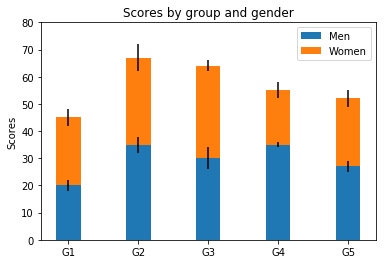

In [7]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# plt.show()

Text(0.5, 0, 'title of the xlabel')

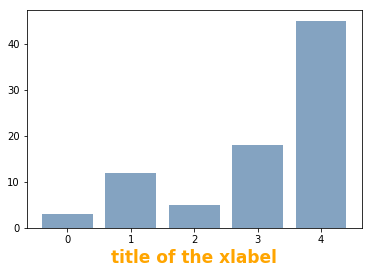

In [6]:
import numpy as np
import matplotlib.pyplot as plt
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# Custom Axis title
plt.xlabel('title of the xlabel', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')

In [8]:
# create a histogram of top-3 noun-phrases 
top3NPs = {}
for i, claim in enumerate(claims_with_topics):
#     if i < 5: 
#         print(claim)
    noun_phrases = claim['noun_phrases']
    
    for x in noun_phrases[0:3]: 
        if x[0] in top3NPs:
            top3NPs[x[0]] += 1
        else: 
            top3NPs[x[0]] = 1

In [11]:
import operator
top3NPsSorted = sorted(top3NPs.items(), key=operator.itemgetter(1), reverse=True)

In [12]:
top3NPsSorted

[('people', 82),
 ('children', 31),
 ('the eu', 30),
 ('women', 27),
 ('the united states', 25),
 ('us', 24),
 ('africa', 24),
 ('the government', 20),
 ('the state', 19),
 ('the world', 19),
 ('schools', 17),
 ('countries', 16),
 ('the internet', 16),
 ('parents', 16),
 ('students', 15),
 ('one', 14),
 ('the right', 14),
 ('the icc', 13),
 ('the us', 13),
 ('animals', 12),
 ('the use', 12),
 ('money', 11),
 ('school', 11),
 ('human rights', 10),
 ('society', 10),
 ('nuclear weapons', 10),
 ('russia', 10),
 ('the uk', 9),
 ('access', 8),
 ('governments', 8),
 ('violence', 8),
 ('democracy', 8),
 ('china', 8),
 ('the people', 8),
 ('teachers', 8),
 ('the un', 8),
 ('britain', 8),
 ('the child', 7),
 ('drugs', 7),
 ('their children', 7),
 ('aid', 6),
 ('smoking', 6),
 ('humans', 6),
 ('universities', 6),
 ('life', 6),
 ('themselves', 6),
 ('israel', 6),
 ('university', 6),
 ('men', 6),
 ('nato', 6),
 ('europe', 6),
 ('the law', 6),
 ('the economy', 6),
 ('the media', 6),
 ('climate chang

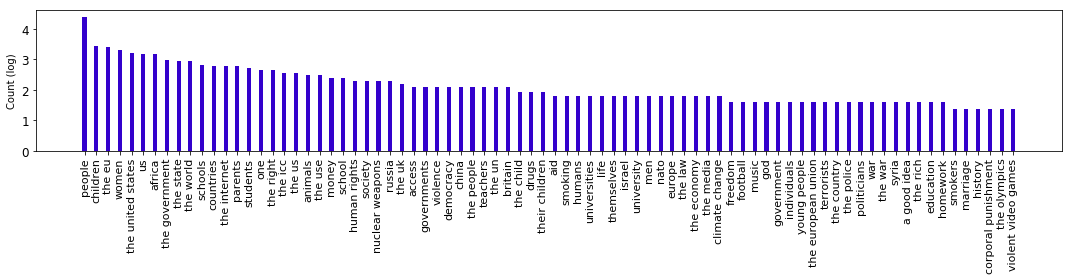

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import math 

N = 80
labels = [x[0] for x in top3NPsSorted[0:N]]
counts = [math.log(x[1]) for x in top3NPsSorted[0:N]]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(15,4))
p1 = plt.bar(ind, counts, width, color=(0.2, 0.0, 0.8, 1.0))

plt.ylabel('Count (log)')
# plt.title('Popular NPs in our dataset.')
plt.xticks(ind, labels, rotation=90, fontsize = 11)
plt.yticks(fontsize = 12)
# plt.legend((p1[0], p2[0]), ('Men'))
plt.tight_layout()
plt.savefig("histogram_of_nps.png", dpi=500)
plt.savefig("histogram_of_nps.pdf", format='pdf', dpi=50)
plt.savefig("histogram_of_nps.eps", format='eps', dpi=50)

In [71]:
# calculating claim similarities in order to perform clusetering 

# first extract the lemmeas for each claim 
from ccg_nlpy import remote_pipeline
import re
import operator

rx = re.compile('\W+')

pipeline = remote_pipeline.RemotePipeline(server_api='http://macniece.seas.upenn.edu:4001')

# output = []

for claim in data: 
    print("--------------------")
    print(claim['claim_title'])
    doc_claim = pipeline.doc(claim['claim_title'])
    doc_related = pipeline.doc(rx.sub(' ', claim['related']).strip())
    if doc_claim.get_lemma != None: 
        claim_lemmas = [x['label'].lower() for x in doc_claim.get_lemma.get_cons() if x['label'] not in stopwords]
    else: 
        claim_lemmas = []
        
    if doc_related.get_lemma != None: 
        related_lemmas = [x['label'].lower() for x in doc_related.get_lemma.get_cons() if x['label'] not in stopwords]
    else: 
        related_lemmas = []
    claim['claim_lemmas'] = claim_lemmas
    claim['related_lemmas'] = related_lemmas

INFO:ccg_nlpy.pipeline_config:Using pipeline web server with API: http://macniece.seas.upenn.edu:4001
INFO:ccg_nlpy.remote_pipeline:pipeline has been set up


--------------------
The use of child performers should be banned
--------------------
Celebrities should be exempt from National Service (in South Korea)
--------------------
Trade is better than aid
--------------------
It should be allowed to have military recruitment in schools
--------------------
Rupert Murdoch is not a fit person to run an international media corporation
--------------------
Smoking should further be restricted
--------------------
Animals have rights.
--------------------
Proportional representation is necessary.
--------------------
There must be a child curfews
--------------------
It is important to use a graduated response to combat unauthorised file-sharing of copyrighted material
--------------------
Internet access is a human right
--------------------
It is important to use foreign aid funds to research and distribute software that allows bloggers and journalists in non-democratic countries to evade censorship and conceal their online activities.


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Ratify the Anti-Counterfeiting Trade Agreement (ACTA).
--------------------
Governments be allowed to disrupt Internet service on grounds of national security.
--------------------
A new global body, the United Nations Committee for Internet Related Policies, take over internet governance.


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The net neutrality legislation has to be supported.
--------------------
There should be a presumption in favour of publication for information held by public bodies
--------------------
Goal line technology has to be adopted in football
--------------------
permit the use of performance enhancing drugs in professional sports
--------------------
All nations should ban bullfighting
--------------------
Instant Replay Should Be Used in Major League Baseball
--------------------
The music that glorifies violence against women should be banned
--------------------
It is crucial to explore the universe
--------------------
Gay couples should be allowed to marry
--------------------
The Catholic Church is justified in forbidding the use of barrier methods of contraception
--------------------
Atheism is the only way
--------------------
Anarchism is a valuable political ideology
--------------------
Democracy has to be imposed, if needed
--------------------
Capitalism 

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Blasphemy criminalise
--------------------
Music containing lyrics that glorify violent and criminal lifestyles should be banned
--------------------
The leaking of military documents by Anat Kamm was justified
--------------------
Users of extremist websites should be punished
--------------------
India’s Ban on the Satanic Verses is justified
--------------------
Corporations’ Use of IP Laws in Relation to Event Sponsorship Poses a Threat to Freedom of Expression
--------------------
We should fear the power of government over the Internet
--------------------
Religious freedom abroad should be one of the primary foreign policy concerns for any country
--------------------
The BBC should be free to blaspheme
--------------------
It makes sense to drive to an out of town to a shopping centre
--------------------
Nuclear technology must be adopted
--------------------
Performing tests on animals must be banned
--------------------
Private universities in the UK mus

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Sexual orientation should be considered grounds for asylum
--------------------
Prostitution has to be legalised
--------------------
The right to asylum should not be absolute
--------------------
Anti-Social Behaviour Orders (UK) must be scraped
--------------------
Positive discrimination has to be used to increase diversity in university
--------------------
require the ICC to allow a defence of “cultural relativism” to the crime of recruiting and using child soldiers


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
An amnesty to illegal immigrants has to be granted
--------------------
The sale of children’s toys as part of fast food meals must be prohobited.
--------------------
Nations of the world should increase protection of the economic and social rights of migrants
--------------------
Children in developing countries should be sponsored
--------------------
You should never have children
--------------------
Housewives should be paid for their work
--------------------
The USA's social security schemes should be privatized
--------------------
Security profiling at airports is justified
--------------------
Cohabiting couples who wish to end their relationships should be allowed to request that the courts supervise the division of their property
--------------------
Hate crime 'enhancements' are unjust
--------------------
The age of consent laws should be lowered
--------------------
Partial birth abortions should be banned
--------------------
Marriage is an outdate

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Feminism Is Still Needed
--------------------
Countries with an imbalanced male/female ratio skewed towards males should encourage parents to produce girls
--------------------
Parents should be allowed to genetically screen foetuses for heritable diseases
--------------------
Hate speech on campus has to censored
--------------------
Parents should be able to choose the sex of their children
--------------------
It should be allowed to patent genes
--------------------
Homosexuals should be able to adopt
--------------------
All illegal immigrants must be repatriated
--------------------
Racial quotas must be set in South African rugby
--------------------
South Africa should host an Olympics
--------------------
Gabon hosting the Africa Cup of Nations was a good thing
--------------------
Restrictions must be imposed on overseas players in football
--------------------
Playoffs must be implemented in collegiate level american football
--------------------
Boycott

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Ban all anonymous posting and commenting on the Internet
--------------------
You have nothing to worry about surveillance if you have done nothing wrong
--------------------
Indiscriminate NSA surveillance of the rest of the world hurts the United States
--------------------
You should join Facebook
--------------------
I believe in the Right to be forgotten
--------------------
During riots it might make sense to block access to social messaging networks
--------------------
Western companies have to incentivised to build software that provides anonymity to those involved in uprisings
--------------------
State funding to universities have to be conditioned upon all academic work being made available to the general public
--------------------
Online gambling has to be banned
--------------------
Universities should make all academic work they produce, including scholarly articles, course handbooks and recorded lectures, available to the general public
-----------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
politicians have no right to privacy
--------------------
We have to offer amnesty to bloggers currently prosecuted by their native states


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We have to cut the length of copyright protection
--------------------
It is important to ban the sale of surveillance technology to non-democratic countries
--------------------
Targeted online advertising on the basis of user profiles and demographics must be banned
--------------------
The state should provide broadband internet through nationalized companies
--------------------
Internet service providers should be allowed to block access to extremist websites
--------------------
Do not allow companies to collect/sell the personal data of their clients


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
All literature, art, photography, film and music should be released under Creative Commons licenses
--------------------
States should stimulate (or subsidise) mother tongue education for large immigrant groups.
--------------------
Forced evictions are necessary for African cities to become global players.
--------------------
We have to follow countries such as Senegal that have quotas for women in politics
--------------------
The government of Uganda has failed its citizens over LGBT rights
--------------------
We have to teach creationism in schools
--------------------
Domestic intelligence agencies have a legitimate role to play in democracy
--------------------
Wire-tapped and ‘intercepted’ evidence must be allowed as admissible in court
--------------------
The right to anonymous posting on the internet should be protected by law
--------------------
There must be a ban the sale of 3D printers to households
--------------------
The new technologies will ma

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Belief in God is irrational
--------------------
Religious beliefs should override government laws
--------------------
The Church of England should be separated from the British state.
--------------------
It is fine to kill one to save many
--------------------
Make all museums free of charge
--------------------
Remove the requirement for Catholic Priests to take a vow of celibacy
--------------------
Remove the words "under God" from the American Pledge of Allegiance
--------------------
(as a Christian Church) allow the ordination of gay and lesbian priests
--------------------
Traditional university has to be replaced by online learning
--------------------
Tanzania’s taxation on mobile phones is a good model
--------------------
We have to produce high quality generic drugs for Africa
--------------------
German prosecutors should investigate NSA surveillance of Angela Merkel
--------------------
Ban animal testing
--------------------
Every child should hav

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Cyberbullies must be punished with prison even if under 18
--------------------
Intellectual migration (brain drain) is caused by a lack of belonging rather than a lack of opportunities
--------------------
Cut aid to African states that criminalise homosexuality
--------------------
We must enable free movement of labour across Africa to alleviate poverty disparities.
--------------------
African cities need to invest more in housing to replace slums
--------------------
The feminisation of Africa’s labour force is empowering women
--------------------
Poverty is the most important security issue facing Africa
--------------------
Civil society should be granted a wider participation in Africa’s political life
--------------------
Legal empowerment is provided for women through land titling
--------------------
We must hold a referendum on UK membership in the EU
--------------------
The Arab Spring revolutions can create stable democracies.
--------------------
A

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Should the U.S. Government continue to spend at current levels even if it means raising taxes
--------------------
We must let Catalan hold an independence referendum
--------------------
It is worth voting


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Abandon Kofi Annan’s peace plan for Syria
--------------------
Greece should default on its debt and return to the Drachma
--------------------
We support the New START Treaty
--------------------
The Dalai Lama’s ‘third way’ in Tibet
--------------------
Puerto Rico should seek American statehood
--------------------
We should directly elect city mayors
--------------------
Abolish the Superdelegate System for Democratic Party Conventions
--------------------
Quebec should secede from Canada
--------------------
Opinion polls harm the democratic process
--------------------
Recognise Kosovo as an independent state
--------------------
The EU, USA and other western donors should not fund any Palestinian government in which terrorist organisations participate
--------------------
University education should be free
--------------------
Grant politicians immunity from prosecution
--------------------
The UN should recognize a Palestinian state
--------------------
Re

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Abandon the timetable for withdrawal from Afghanistan
--------------------
The northern Ireland would be better off if united with the Republic of Ireland
--------------------
Abolish all collective bargaining rights claimed by trades unions
--------------------
We must support the use of truth and reconciliation commissions
--------------------
We must ban negative advertising in political campaigns


--------------------
We should encourage increased use of referendums
--------------------
The governance of the United States should be split between the two major US political parties


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We must hold all U.S. presidential primaries on the same day
--------------------
We oppose the U.S. hegemonic military power
--------------------
The US intervention in Libya, lacking congressional approval, was illegal
--------------------
Socialism is Dead
--------------------
The use of atomic bombs against Hiroshima and Nagasaki was justified
--------------------
The republican party has lost its way
--------------------
Abolish the monarchy.
--------------------
The United States’ individual health insurance mandate is unconstitutional
--------------------
Abolish the US Electoral College
--------------------
We must support the Scottish Independence
--------------------
There must be compulsory identity cards
--------------------
The War in Iraq was Worth the Cost
--------------------
Bribery is sometimes acceptable
--------------------
We must extend NATO membership to Georgia and Ukraine
--------------------
We must invade and forcibly reunify the Korean p

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
There can be such a thing as a Just War
--------------------
Terrorism can be justified
--------------------
There must be referendums held on any new EU treaty
--------------------
There is a need for developing tactical nuclear weapons
--------------------
Abolish nuclear weapons
--------------------
We can trust Republicans with the economy
--------------------
Britain should join the Euro currency
--------------------
We must enforce term limits on the legislative branch of government
--------------------
Voting should become compulsory
--------------------
Self-determination of peoples is a human right
--------------------
Federal States are better than unitary nations
--------------------
Create a UN standing army
--------------------
We should support enforcing term limits on the executive branch of government
--------------------
We should detain terror suspects without trial
--------------------
The world has to ignore North Korean provocations
-----------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Governments should unleash the free market
--------------------
Assisted suicide should be legalized
--------------------
Civil liberties should be sacrificed for the greater good
--------------------
The right to trial can be limited by jury in some criminal cases
--------------------
UK would have more influence outside the EU
--------------------
Leaving the EU would increase British security
--------------------
UK should have a second Brexit referendum before leaving the EU
--------------------
We must have weapons inspectors leave Syria
--------------------
African leaders should be transparent about their health
--------------------
Launching a military coup against a democratic government can be justified
--------------------
Russia has the right to send troops into Crimea
--------------------
Throw Russia out of the G8
--------------------
It is a good idea to lease Crimea to Russia
--------------------
The African Union can meet its pledge to end all war 

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Ariel Sharon was not tried for war crimes by an international court
--------------------
Eritrea is responsible for its isolation
--------------------
The Mo Ibrahim prize encourages good governance
--------------------
The Egyptian army was right to depose Morsi
--------------------
Put taxes/revenue from oil into a trust fund independent of politicians influence
--------------------
The prevalence of ‘African mercenaries’ is decreasing
--------------------
We must negotiate with terrorists
--------------------
Individuals who have committed atrocities in the Syrian Civil War should be investigated by the ICC
--------------------
European Parliament elections should involve only one voting district: all of Europe and not separate country seats
--------------------
The best way to protect Scottish interests in the EU is to vote for independence
--------------------
Turkey is not a democracy
--------------------
NATO has succeeded in Afghanistan
--------------------

--------------------
Hold students legally responsible for bullying if it resulted in the victim's death
--------------------
Limit prison to violent offenders


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Fund needle exchanges
--------------------
Cede control of the Falkland (Malvinas) Islands to Argentina
--------------------
Criminal justice should focus more on rehabilitation
--------------------
Disclose previous convictions in court
--------------------
Treat the desecration and destruction of high-value sites and property of cultural heritage as a crime against humanity
--------------------
Military action to intervene during atrocities without United Nations Security Council approval can be legal
--------------------
Create an African Criminal Court
--------------------
Guinea-Bissau should not let itself be turned in to a front of the US’ "war on drugs"
--------------------
Send Yanukovych to The Hague
--------------------
The ICC is not an effective deterrent
--------------------
The ICC is biased against Africa
--------------------
The Uhuru Kenyatta indictment was an unwelcome interference by the ICC
--------------------
Prosecutions help the healing pro

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The United States is responsible for Mexico’s drugs war
--------------------
Media reporting on violent crimes should be restricted
--------------------
Fines should be made relative to income
--------------------
Social disgust is legitimate grounds for restriction of artistic expression
--------------------
Social deprivation causes crime
--------------------
A legal qualification is worth the cost
--------------------
It is fine to do random drug-testing in schools
--------------------
The European Union should lift its ban on member states selling arms to China
--------------------
We should ban the depiction of smoking in films
--------------------
We should legalise the growing of coca leaf
--------------------
Beauty contests should be banned
--------------------
War criminals should be prosecuted
--------------------
The Schengen Agreement must be dissolved
--------------------
The US should have done more for Darfur
--------------------
The Guantanamo Bay 

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Obama was right to agree to meet rogue leaders without preconditions
--------------------
Europe should be federal
--------------------
We should end western states' control over the International Monetary Fund
--------------------
We should support the creation of a Free Trade Area of the Americas
--------------------
The Palestinian Statehood should be recognised by the United Nations General Assembly
--------------------
The integration of Africa through the African Union can succeed
--------------------
We should give cash to the poor to reduce poverty
--------------------
Take a visit the Yasukuni Shrine
--------------------
Dictatorship is the best path to development
--------------------
Build the Grand Inga Dam
--------------------
The African Union should create a standing army
--------------------
Ethiopia is right to build a dam on the River Nile
--------------------
Africa is really rising
--------------------
Create an international treaty/ban on cyber

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The EU should engage in further enlargement
--------------------
Israel should return to its pre-1967 borders
--------------------
The world should intervene to prevent the collapse of the state in other countries
--------------------
The United Nations has failed
--------------------
Former colonial powers should pay reparations to former colonies
--------------------
We should expand NATO
--------------------
Europe still needs a constitution
--------------------
We believe in world government
--------------------
Jerusalem should be divided
--------------------
Offshoring is a good idea
--------------------
It is a good idea to build the Keystone XL pipeline
--------------------
We should drop the sanctions against Cuba.
--------------------
Britain should give up its EU rebate
--------------------
Switzerland and Norway should apply to join the EU


--------------------
The European Union should adopt a single working language through which to operate.
--------------------
The European Parliament should be the sovereign law-making body of Eurozone states


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
In the conflict between Israel and Palestine, a two-state solution is better justified than a one-state solution
--------------------
You should always suspend directly delivered foreign development aid
--------------------
The United States is a ‘benign’ hegemon
--------------------
The United Nations budget must be frozen
--------------------
Grant the EU a permanent seat on the UN Security Council
--------------------
As the developed world, we must fund African climate adaptation


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Private sector involvement is necessary to improve healthcare in Africa
--------------------
We should provide access to microfinance for the ‘unbanked’
--------------------
The UN intervention in the Democratic Republic of Congo has been a success
--------------------
Men are the key to family planning in Uganda
--------------------
Governments must be encouraged to implement an ‘open sky’ agreement within Africa
--------------------
Ghana’s ban on smoking in public places is a model for Africa
--------------------
The outcome of the Paris Climate Conference needs to be an international treaty with binding emission cuts
--------------------
Deny Organs to Non-Donors
--------------------
Promote safe sex through education at schools


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Require the provision of cannabis in any state funded medical program
--------------------
Labels on food must be mandated to encourage people to eat better
--------------------
Introduce a “fat tax”
--------------------
Provide breakfast for all school students
--------------------
Airbrushing of women’s bodies in the media be banned
--------------------
New York City has the right to regulate the size of sodas bought on the market
--------------------
We must ban the promotion of diets
--------------------
Alternative medicine poses a threat to public health
--------------------
There mut be a system of universal healthcare
--------------------
Ban the use of trans fats in food stuffs
--------------------
Allow pharmaceutical companies to advertise directly to consumers
--------------------
Employees Should Be Compelled To Disclose Their HIV Status to Employers
--------------------
Multiple Vaccines Safe
--------------------
Ban alcohol
--------------------
Lmple

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Cape Verde’s regional future lies with Europe, not Africa
--------------------
The Seychelles should buy territory and relocate due to climate change
--------------------
Limited press and speech freedom will hinder progress in Rwanda


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Sao Tome would drop relations with Taiwan in favour of Mainland China
--------------------
Widen the East African Community
--------------------
Spain should cede Ceuta and Melilla to Morocco
--------------------
Implent the Virtual Doctor Project in Zambia


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Tunisia should not rely on tourism for economic growth
--------------------
The Chagos Islands must be returned to Mauritius
--------------------
The lack of investment in teachers is the greatest barrier to achieving universal primary education
--------------------
Nollywood could be an effective instrument to change perceptions of Africa
--------------------
African governments must implement tougher protections for animals
--------------------
Africans are worse off due to natural resources
--------------------
African borders must be redefined to reflect ethnic groups
--------------------
A permanent UNSC seat with veto power must be reserved to an African country
--------------------
Legalize sex work in order to make controls more feasible and effective to combat HIV/AIDS
--------------------
Julian Assange is a journalist
--------------------
Freedom of expression is more important than religious sensitivities
--------------------
A nation's history and myth

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The EU should abandon nuclear energy
--------------------
Adaptation should be the most urgent response to Climate Change
--------------------
School uniforms must be banned
--------------------
The payment of welfare benefits to parents should be tied to their children's school attendance records
--------------------
Vaccination must be made compulsory
--------------------
Introduce year round schooling
--------------------
Abolish standardized tests for University Admission
--------------------
Degrees in the creative arts are luxuries society can no longer afford
--------------------
Raise the school leaving age to 18
--------------------
Encourage fewer people to go to university


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Mathematics should not be a compulsory subject in schools.
--------------------
Homework is a waste of time
--------------------
Poetry should not be taught in schools
--------------------
Provision of higher education must be funded by taxing graduates
--------------------
Fund education using a voucher scheme
--------------------
Parents should be held responsible for their school-going children's discipline problems
--------------------
Make lessons in a foreign language compulsory for school pupils
--------------------
People should have a right to private education
--------------------
Raise The School Leaving Age To 18
--------------------
Make sex education mandatory in schools
--------------------
Ban homework
--------------------
Build a third Heathrow runway to maintain its position as a hub airport
--------------------
Ban the slaughter of animals which have not been stunned first
--------------------
Cease the exploitation of the Arctic Region
---------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Rumours about politicians should not be reported
--------------------
The imprisoned members of Pussy Riot should be considered political prisoners
--------------------
Limit the free speech rights of corporations that are granted legal personhood
--------------------
Western universities should only place satellites in states that respect free speech
--------------------
The decision of the state of Bavaria to publish Mein Kampf
--------------------
Protect braille out of respect for free speech
--------------------
Penalise religious hate speech
--------------------
Allow celebrities to switch off the limelight
--------------------
Defending the enemies of one's nation is legitimate free speech
--------------------
We believe in the right to reply
--------------------
Blasphemy has no place on the statute books
--------------------
Christians should be allowed to wear the Cross at work
--------------------
University education should be free
--------------------


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The use of standardized tests is improving education in America
--------------------
Tablets should replace textbooks in K-12 schools
--------------------
Social networking sites are good for our society
--------------------
Students should have to wear school uniforms
--------------------
Recreational marijuana should be legal
--------------------
Bill Clinton was a good president
--------------------
More gun control laws should be enacted
--------------------
The United States return to a gold standard
--------------------
The drinking age should be lowered from 21 to a younger age
--------------------
College football should replace the bowl championship series (BCS)
--------------------
The United States should maintain its embargo against Cuba
--------------------
Human activity is primarily responsible for global climate change
--------------------
Cell phone radiation is safe
--------------------
We should support universal basic income
--------------------

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The Prohibition of drugs doesn’t work
--------------------
Examinations are a fair way of testing our knowledge
--------------------
School Uniforms Should Be Mandatory
--------------------
People should lose their jobs for saying the wrong thing
--------------------
Wikileaks is not and has never been a non-profit organization
--------------------
Baby ear piercing should be banned


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Japan needs US military bases
--------------------
Should Abortion Be Further Restricted Or Banned Completely
--------------------
We should be investing in public transport
--------------------
Power only has two dimensions
--------------------
Same sex relationships should have the same legal status as heterosexual relationships under EU law
--------------------
The Spread of Nuclear Weapons: More may be better
--------------------
We should abolish speed cameras
--------------------
16 year olds should be able to vote at presidental elections
--------------------
Mossad should carry out extrajudicial killings


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
International Adoption should be banned
--------------------
Google knows too much about us
--------------------
Positive Discrimination Towards Women in Society Is Justified
--------------------
Gorbachev Was Responsible for The Collapse Of The USSR
--------------------
Hacking Can Be Justified
--------------------
Less time outdoors is severely detrimental to the physical and emotional wellbeing of children
--------------------
China should be allowed more control over its own seas
--------------------
The breeding of white tigers in captivity should be banned
--------------------
Children should be allowed to have facebook accounts
--------------------
Animals should be kept in zoos
--------------------
Military recruiting in schools
--------------------
International students are charged unfairly high tuition fees at UK universities
--------------------
Science can determine human values
--------------------
All evidence gathered by intelligence agencies should

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Tax cuts, not government spending, are the best way out of recession
--------------------
Books should have content warnings
--------------------
Mexican culture was incurably damaged by the introduction of Christianity
--------------------
The Death Penalty Should Be Imposed For Acts Of Terror That Cause Death
--------------------
Housewives Are More Responsible Mothers Than Working Women
--------------------
Public high school students in the United States ought not be required to pass standardized exit exams to graduate
--------------------
Prescription drugs are overpriced
--------------------
Terrorists should be subject to the Geneva Conventions
--------------------
Mixed Martial Arts (UFC) is a form of human cockfighting
--------------------
Socialism is a failed government subdomain


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Direct vs. Representative Democracy
--------------------
Inheritance tax should be raised to 100% for everyone born in the UK
--------------------
British atrocities: The Blood Never Dried
--------------------
America should have universal healthcare
--------------------
Reality TV has gone too far
--------------------
Parents should have the right to do background checks on those looking after their children
--------------------
Unilateral nuclear disarmament is the best way to create a safer world
--------------------
Any job is better than no job
--------------------
The world should go vegan
--------------------
Capitalism is creating an expanding gap between the rich and the poor
--------------------
Maths should be a compulsory subject at GCSE
--------------------
There should be video replays for refs in football
--------------------
Aid is killing Africa
--------------------
It is time to stop buying bottled water
--------------------
Money Is the Root of A

--------------------
The Catholic Church needs reform
--------------------
Books vs TV. TV wins.


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Cheap Flights Do more Harm Than Good
--------------------
Accessing your spouse’s email account hacking
--------------------
Animals have a right to privacy


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
People who plea guilty early should receive more lenient sentences
--------------------
Man made climate change is a myth
--------------------
Swearing should be illegal
--------------------
Everyone Should Automatically Be Opted into an Organ Donation Scheme
--------------------
Sports initiations should be banned
--------------------
Britain should scrap the monarchy
--------------------
Improving access to contraception will lower the number of teenage pregnancies
--------------------
Too much importance is placed upon correct spelling and grammar
--------------------
Liberal democracies are better at providing people’s needs than non-democracies.
--------------------
Does Mother Nature rule the world
--------------------
We should ban the church of scientology
--------------------
The US and its allies were justified in taking military action against Iraq following Iraq’s invasion of Kuwait
--------------------
This House Would Arrest Batman


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
G20 protests – at best a waste of time, at worst a dangerous disruption
--------------------
It is selfish to have more than two children
--------------------
Only buildings that are historically important should be preserved
--------------------
Tuition Fees Should Be Increased


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Absolute Monarchy was Limited Monarchy
--------------------
The EU should return power to national governments
--------------------
The United States was correct in going to war against North Korea in support of their territory of South Korea.
--------------------
Discipline In Schools Needs To Be Improved


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Deny Organ Transplants from People Not Registered as Donors
--------------------
The United States’ role in the Vietnam War was an unnecessary step in the fight against communism.
--------------------
Children should be seen and not heard
--------------------
Rail travel is the best mode of transport for the future
--------------------
The national curriculum should be scrapped


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Should The Burning Of Holy Books Be Banned
--------------------
Wind farms are a good solution to the energy crisis
--------------------
All our actions are determined in some way
--------------------
It should be compulsory for all mothers to breastfeed for the first six months of their babies lives
--------------------
The grammar school system should be reintroduced in the UK
--------------------
Slang prevent young people from being able to communicate properly
--------------------
The EU should significantly reduce the amount it spends on agricultural production subsidies
--------------------
Sikh school pupils should be allowed to carry ceremonial daggers
--------------------
Joe Calzaghe deserves to be recognized as one of the greatest boxers of all time


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
PHILOSOPHY – Utilitarianism isn’t as fair as it initially seems
--------------------
“Specialists are overrated and too ubiquitous presently; we need more generalists”
--------------------
National service should be re-introduced
--------------------
The glass ceiling still exists
--------------------
Religion is not necessary
--------------------
Parents of obese children be prosecuted with neglect
--------------------
Romeo and Juliet do promote knife crime
--------------------
The use of mobile phones has lowered active social life and has become an addiction
--------------------
Winning the Champions League Is Better Than Winning the Premier League
--------------------
Books will be replaced at some point
--------------------
Parents should not allow young people to live at home again after graduating
--------------------
A Ban on Shark Fin Soup Is Necessary to Protect the Shark from Extinction
--------------------
We should show more compassion to drug addicts

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Universities should support graduates in getting a job
--------------------
Cyber Stalking has its consequences
--------------------
People should be allowed to sell their own organs
--------------------
The People’s Republic of China should invade North Korea
--------------------
Increased taxes are good for America
--------------------
Healthy eating should be made mandatory


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Game strategies: Cooperation vs Competition
--------------------
High taxes are necessary for an effective state
--------------------
Corporations are a threat to Democracy and society.
--------------------
Make-up is bad for us
--------------------
We should be trying to avoid contact with aliens.
--------------------
The welfare system should be replaced with a negative income-tax model
--------------------
We should give money to beggars
--------------------
Sunbeds should be banned
--------------------
Governments Should Put Wealth Redistribution Ahead Of Wealth Creation
--------------------
physical fitness is better than mental fitness
--------------------
Speed limits should be reduced
--------------------
It is wrong to tolerate unjust laws
--------------------
Representative Democracy Is a Better Form of Government Than Direct Democracy
--------------------
Hosting the world cup is beneficial
--------------------
Those affected by climate change should get

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Forced marriage should be banned
--------------------
Anti-social behaviour orders are effective
--------------------
The media’s selective coverage of certain issues works to worsen problems in society and create problems
--------------------
Teachers Should Have The Right To Punish Pupils Physically If The Parents Consent
--------------------
Female Children Are More Useful at Home


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Sports Have Became More About Making Money Than Playing Well
--------------------
Junk Food Should Be Banned
--------------------
Lack of Parental Guidance Is Mainly Responsible for Children Being Violent and Aggressive in School
--------------------
Fast Food Advertising Should Be Banned
--------------------
Using Rewards to Motivate Students


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Religious education Should be a part of the School curriculum
--------------------
There shouldn’t be an option to dropout of highschool
--------------------
Reality TV shows are an important part of popular culture today.
--------------------
Developed Countries Should Accept More Refugees
--------------------
There is a world Water crisis


--------------------
Competition in the long run is healthy rather than harmful for the community: GRE issue
--------------------
The evil that men do lives after them, the good is often interred with their bones


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Wikileaks is a threat to national security
--------------------
The iPhone is better than the Blackberry
--------------------
Television is one of the most effective mediums through which to teach and inspire youngsters
--------------------
DNA testing is worth the money
--------------------
Social Media should be part of the curriculum
--------------------
Individuals have a moral obligation to assist people in need
--------------------
Chocolate is good for you
--------------------
Britain should become a republic


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
People should be allowed to do what they want to their own bodies
--------------------
We should still be concerned about the ozone layer
--------------------
We have lost the true meaning of Christmas
--------------------
Electronic tags are a good idea
--------------------
The law on self defence should cover ‘grossly disproportionate’ actions
--------------------
Gender equality will not happen anytime soon
--------------------
Use of goal line technology in football is overdue, and can only lead to benefits.
--------------------
German unification has been a success
--------------------
Reheat tea in the microwave
--------------------
The UN should impose sanctions on countries that destroy their rainforests


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Children should be taught politics at school
--------------------
All countries should have the right to pursue a nuclear defence
--------------------
Stop the Olympic Games
--------------------
ID cards and the National Identity Register should be scrapped
--------------------
Governments Should Try To Reduce The Gap Between Their Richest And Poorest Citizens
--------------------
Governments Should Actively Promote Multiculturalism
--------------------
University Fees Should Be Scrapped
--------------------
The Private Education System Should Be Abolished
--------------------
The United States is justified in using private military firms abroad to pursue its military objectives
--------------------
Eliminate All Nuclear Weapons
--------------------
Constitutions Should Not Give Special Recognition To Minority Groups
--------------------
Co2 Does Not Cause Global Warming
--------------------
The Minimum Driving Age Should Be Raised to 18
--------------------
Cars S

--------------------
HIV/AIDS: There Should Be Compulsory Testing and Labeling of People with HIV
--------------------
India should give up Kashmir
--------------------
Economic Sanctions Ought not be used to Achieve Foreign Policy Objectives


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
People on job seekers allowance who refuse a job should lose their benefits
--------------------
Democracy Is the Best Form of Government
--------------------
Children Should Have The Right To Vote In Elections
--------------------
CCTV is a threat to freedom
--------------------
Boys should go to boys only schools
--------------------
Parents should introduce children to alcohol (in moderation) at an early age
--------------------
We Should Question Authorities
--------------------
Space should not be used for military purposes
--------------------
Ten Commandments:  Display in Schools


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Visitors to museums should be “encouraged” to pay a voluntary entrance fee
--------------------
Causing Religious Offence Should Be A Civil Offence
--------------------
Newspapers Are a Thing of the Past
--------------------
Governments should spend their way out of the recession
--------------------
Christmas is a scam
--------------------
Russia is a land of democracy (not autocracy)


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Money undermines sport’s values
--------------------
The EU needs a common immigration policy
--------------------
Rain Man is such a bad image of autism
--------------------
Post Office Should Be Privatized
--------------------
Taxes on smoothies and fruit juices should be reduced
--------------------
Schizophrenia is caused by environmental not genetic factors


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We should make new years resolutions
--------------------
Prisoners Should Have The Right To Vote
--------------------
Online education does more good than harm
--------------------
Police Service Should Be Armed (UK)
--------------------
the teacher is always right, even when s/he is not.
--------------------
Experience is the key success for entrepreneurship.
--------------------
Mind Sports Such as Chess, Quizzing and Debating Should Be Olympic Sports
--------------------
Obama did any of the things he promised


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Summer Holidays Should Be Shortened
--------------------
Children should not be allowed to inherit vast wealth as this damages them and society
--------------------
The UK should undergo radical constitutional reform


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Privacy and Freedom Is More Important Than Security
--------------------
Valentines Day is just a Hallmark ploy
--------------------
Catcher in the Rye is a bad book


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The Illegality Of Recreational Drugs Does More Harm Than Good
--------------------
We Should Be Concerned About Population Growth
--------------------
The threat of Climate Change is exaggerated
--------------------
The EU does have a future
--------------------
Technological advancement promotes materialistic society
--------------------
Barbie Dolls are affecting the mental image we create for ourselves
--------------------
Governments of resource-rich nations should impose high taxes on mining and extraction
--------------------
Scotland should cede from the union.
--------------------
Euthanasia or mercy killing is justified
--------------------
Patents on life-saving drugs should be bypassed
--------------------
Deregulation and tax cuts should be embraced to lead the world out of economic crisis.
--------------------
Anti-Bribery Laws On Corporations Should Be Abolished
--------------------
All taxes on inherited wealth should be abolished
-------------------

--------------------
Homework should have a limit
--------------------
Martin Luther King’s dream ha come true


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
We should be free to express our religion as we wish
--------------------
Climate Change is the end of the world
--------------------
Aid Should Be Tied To Human Rights
--------------------
In a democracy all votes should be equal.
--------------------
History as a subject in school is needed
--------------------
The internet’s anonymity is beneficial
--------------------
It is good to gossip
--------------------
There is life after death
--------------------
Painting represents mankind better than Photography
--------------------
Obese people, in countries with a national health service, should face higher taxes
--------------------
Cramming before exams is a bad idea


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The media portrays youths in a negative way
--------------------
Romeo and Juliet is unsuccessful as a tragedy
--------------------
Children should do part time and summer work
--------------------
School Day Should Be Extended
--------------------
punishment should fit the criminal


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Privacy Online is Important
--------------------
There is such thing as a glorious defeat
--------------------
Teachers should get merit pay


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
social networking sites should be banned at the workplaces
--------------------
The European Union should bail out its member countries
--------------------
The Civil War was justified for the north to fight
--------------------
Polls are accurate predictors of election results
--------------------
Online Shopping Is Better Than Offline Shopping


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Genetic Engineering in Humans is Bad
--------------------
Lady Macbeth is the real driving force behind King Duncan’s murder in Shakespeare’s Macbeth
--------------------
Gorbachev was a key player in the fall of the Berlin Wall
--------------------
Gender Equality is Treating Men and Women in the Same Way
--------------------
Paparazzi and press intrude too much into celebrities lives
--------------------
Language does control thought
--------------------
There Is a Mathematical Miracle in the Quran That Proves It Is the Word of God
--------------------
Space Exploration Is a Waste of Money
--------------------
Oil Companies Should Not Be Allowed To Drill Offshore
--------------------
Antarctica Should Be Opened Up For Resource Exploitation
--------------------
Humans should eat meat
--------------------
Workers in the Transport Sectors Should Be Banned From Going On Strike
--------------------
Polygamous Marriage Should Be Recognised
--------------------
Music th

ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The legal age should be lowered to 16.
--------------------
Co-Educational Schools Should Be Supported
--------------------
The UN should be reformed or replaced
--------------------
The environment is being sacrificed for the economy


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
The government should provide more money to fund science
--------------------
New prisons need to be built to ease overcrowding


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
It does matter where you go to university or college
--------------------
Schools are doing enough to prevent illegal drug abuse by teenagers
--------------------
Job applicants should have to disclose their spent criminal convictions


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.
ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Deregulation is good for society
--------------------
Mental ‘illness’ is a socially constructed
--------------------
Roger Federer Is Not the Greatest Tennis Player of All Time
--------------------
Home Schooling Should Be Banned


ERROR:ccg_nlpy.core.text_annotation:No valid views on empty TextAnnotation.


--------------------
Interest rates on personal lending should be capped by law at 20%
--------------------
Democracies should ban the display of communist and Nazi symbols
--------------------
We should prize freedom over security and abolish anti-terrorism legislation
--------------------
All drugs should be decriminalised
--------------------
Poorer Countries Should Abandon Free Trade Agreements
--------------------
Heavy drinkers should be denied liver transplants
--------------------
There is a good case for stating that there is a God
--------------------
Pre-nuptial agreements should not be recognised in divorce courts
--------------------
Same-Sex Marriage Should Be Legal
--------------------
Leaders of countries that use extra-territorial rendition should be tried for war crimes
--------------------
Public health concerns justify compulsory immunization
--------------------
Rich countries should actively recruit medical personnel from poorer countries
--------------------
Dict

In [221]:
alpha = 1.0
beta = 1.0  
        
# define the similarity measure between two claims 
def sim(claim1, claim2): 
    claim1_c = set(claim1['claim_lemmas'])
    claim2_c = set(claim2['claim_lemmas'])
    claim_score = 1.0 * len(claim1_c.intersection(claim2_c)) / max(len(claim1_c), len(claim2_c))
    
    claim1_r = set(claim1['related_lemmas'])
    claim2_r = set(claim2['related_lemmas'])    
#     print(claim_score)
    if len(claim1_r) > 0 and len(claim2_r): 
        claim_score_r = 1.0 * len(claim1_r.intersection(claim2_r)) / max(len(claim1_r), len(claim2_r))
        return beta * (alpha * claim_score  + (1-alpha) * claim_score_r)
    else: 
        return beta * claim_score

In [222]:
# given lemmas, calculate similarity between claims 
similarities = np.zeros((len(data),len(data)))
distance = np.zeros((len(data),len(data)))
for i, claim1 in enumerate(data): 
    for j, claim2 in enumerate(data): 
        if i < j: 
            similarities[i, j] = sim(data[i], data[j])
            similarities[j, i] = similarities[i, j]
            distance[i, j] = 1-similarities[i, j]
            distance[j, i] = distance[i, j]
        else: 
            continue

In [226]:
import numpy as np
from sklearn.manifold import TSNE
embedding = TSNE(perplexity=10, n_components=2, metric='precomputed')
X_embedded = embedding.fit_transform(distance)

(1006, 2)


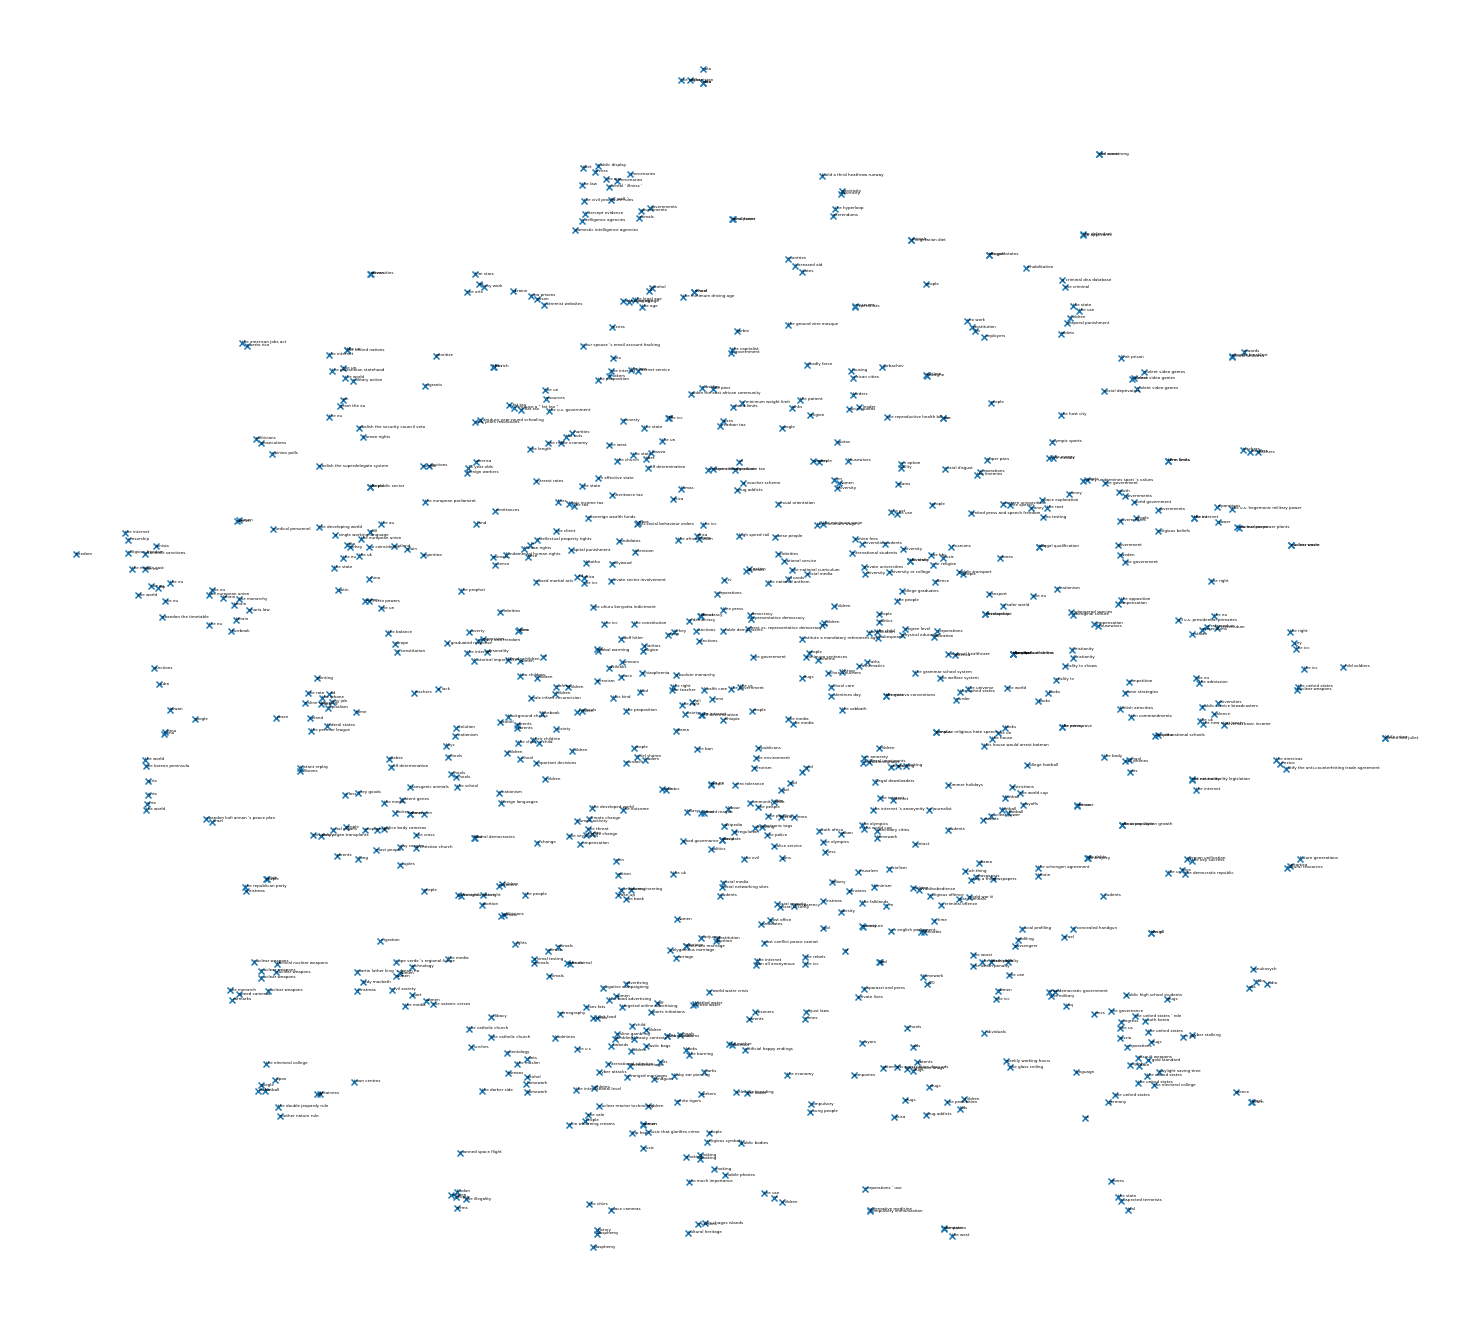

In [227]:
# visualize the tsne output 
import numpy as np
import matplotlib.pyplot as plt

print(X_embedded.shape)

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], marker="x")

for i, claim in enumerate(data):
    if i % 1 == 0: 
        ax.annotate(claims_with_topics[i]['noun_phrases'][0][0], (X_embedded[i, 0], X_embedded[i, 1]), fontsize=4)

plt.savefig("tsne_of_claims2.pdf", format='pdf')

In [228]:
from sklearn import manifold
embeddings = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
X_embedded = embeddings.fit_transform(distance)

(1006, 2)


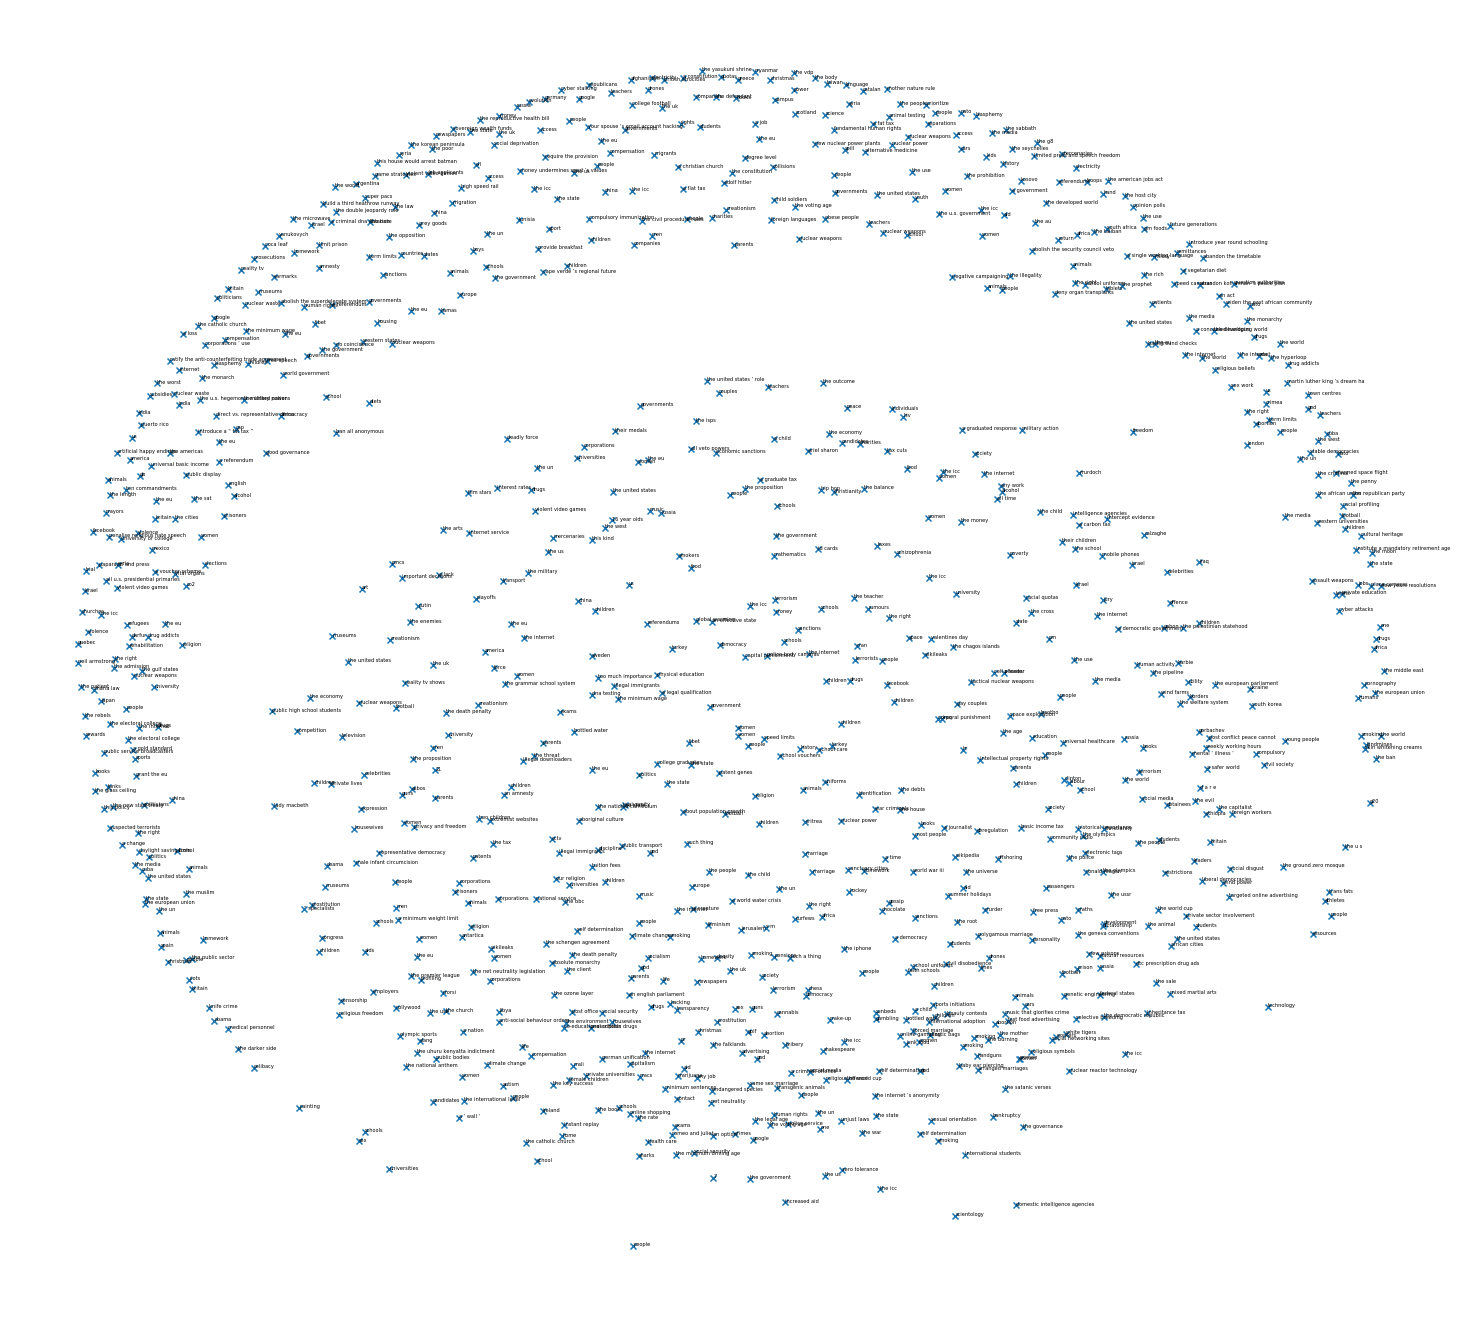

In [230]:
# visualize the tsne output 
import numpy as np
import matplotlib.pyplot as plt

print(X_embedded.shape)

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], marker="x")

for i, claim in enumerate(data):
    if i % 1 == 0: 
        ax.annotate(claims_with_topics[i]['noun_phrases'][0][0], (X_embedded[i, 0], X_embedded[i, 1]), fontsize=5)

plt.savefig("mds_of_claims.pdf", format='pdf')

In [231]:
# cluster the similarities 
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.55, metric="precomputed")
y_db = db.fit_predict(distance)
print(set(y_db))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}


In [232]:
for idx in set(y_db): 
    print("id: " + str(idx) + " -> " + str(list(y_db).count(idx)))

id: 0 -> 74
id: 1 -> 7
id: 2 -> 15
id: 3 -> 7
id: 4 -> 5
id: 5 -> 5
id: 6 -> 5
id: 7 -> 5
id: 8 -> 6
id: 9 -> 5
id: -1 -> 872


In [233]:
# cluster the similarities 
from sklearn.cluster import KMeans
db = KMeans(n_clusters=50, random_state=0, precompute_distances=True)
y_db = db.fit_predict(distance)
print(set(y_db))
for idx in set(y_db): 
    print("id: " + str(idx) + " -> " + str(list(y_db).count(idx)))

for cluster_id in set(y_db):

SyntaxError: unexpected EOF while parsing (<ipython-input-233-0b75c71ac089>, line 10)

In [234]:
# cluster the similarities 
from sklearn.cluster import SpectralClustering
db = SpectralClustering(n_clusters=50, affinity='precomputed')
y_db = db.fit_predict(distance)
print(set(y_db))
for idx in set(y_db): 
    print("id: " + str(idx) + " -> " + str(list(y_db).count(idx)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
id: 0 -> 1
id: 1 -> 872
id: 2 -> 1
id: 3 -> 1
id: 4 -> 1
id: 5 -> 1
id: 6 -> 1
id: 7 -> 1
id: 8 -> 1
id: 9 -> 1
id: 10 -> 1
id: 11 -> 1
id: 12 -> 1
id: 13 -> 1
id: 14 -> 1
id: 15 -> 1
id: 16 -> 1
id: 17 -> 1
id: 18 -> 1
id: 19 -> 1
id: 20 -> 1
id: 21 -> 1
id: 22 -> 1
id: 23 -> 1
id: 24 -> 1
id: 25 -> 1
id: 26 -> 1
id: 27 -> 1
id: 28 -> 1
id: 29 -> 1
id: 30 -> 1
id: 31 -> 1
id: 32 -> 2
id: 33 -> 1
id: 34 -> 8
id: 35 -> 2
id: 36 -> 1
id: 37 -> 2
id: 38 -> 1
id: 39 -> 1
id: 40 -> 75
id: 41 -> 1
id: 42 -> 2
id: 43 -> 1
id: 44 -> 1
id: 45 -> 1
id: 46 -> 1
id: 47 -> 1
id: 48 -> 1
id: 49 -> 1


In [9]:
# count each perspective participates in how many claim: 
import json

perspective_to_claim_map = {}
claim_to_perspective_map = {}

with open('/Users/daniel/ideaProjects/perspective/data/dataset/gold_annotation.json', encoding='utf-8') as data_file:
    data = json.loads(data_file.read())
    for x in data: 
#         print(x.keys())
        if x['perspective_id'] < 8136: 
            if x['perspective_id'] in perspective_to_claim_map: 
                perspective_to_claim_map[x['perspective_id']].append(x['claim_id'])
            else: 
                perspective_to_claim_map[x['perspective_id']] = [x['claim_id']]

            if x['claim_id'] in claim_to_perspective_map: 
                claim_to_perspective_map[x['claim_id']].append(x['perspective_id'])
            else: 
                claim_to_perspective_map[x['claim_id']] = [x['perspective_id']]


928
4231
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 29, 32, 41}


Text(0.5, 1.0, 'Number of perspectives per claim')

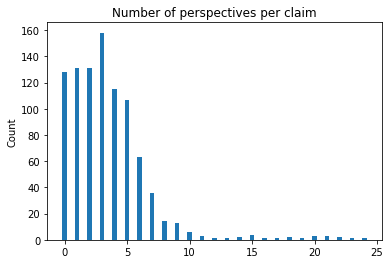

In [10]:
import numpy as np
import matplotlib.pyplot as plt

print(len(claim_to_perspective_map))
print(len(perspective_to_claim_map))

# average perspective per claim 
perspective_sizes = [len(x) for x in claim_to_perspective_map.values()]
perspective_unique_sizes = set(perspective_sizes)
print(perspective_unique_sizes)
perspective_counts = [perspective_sizes.count(x) for x in perspective_unique_sizes]

N = len(perspective_counts)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, perspective_counts, width)

plt.ylabel('Count')
plt.title('Number of perspectives per claim')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], ('Men'))
# plt.show()

{1}


Text(0.5, 1.0, 'Number of claims per perspectives')

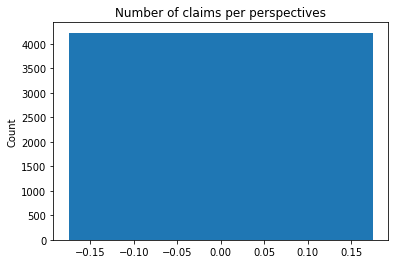

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# print(len(claim_to_perspective_map))
# print(len(perspective_to_claim_map))

# average perspective per claim 
claim_sizes = [len(x) for x in perspective_to_claim_map.values()]
claim_unique_sizes = set(claim_sizes)
print(claim_unique_sizes)
claim_counts = [claim_sizes.count(x) for x in claim_unique_sizes]

N = len(claim_counts)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, claim_counts, width)

plt.ylabel('Count')
plt.title('Number of claims per perspectives')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], ('Men'))
# plt.show()

In [12]:
print(1)

1
